In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper  libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

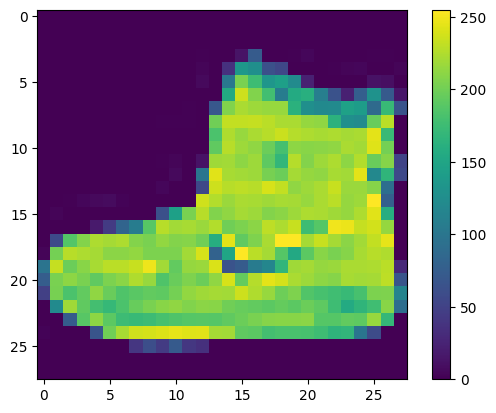

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images /255.0

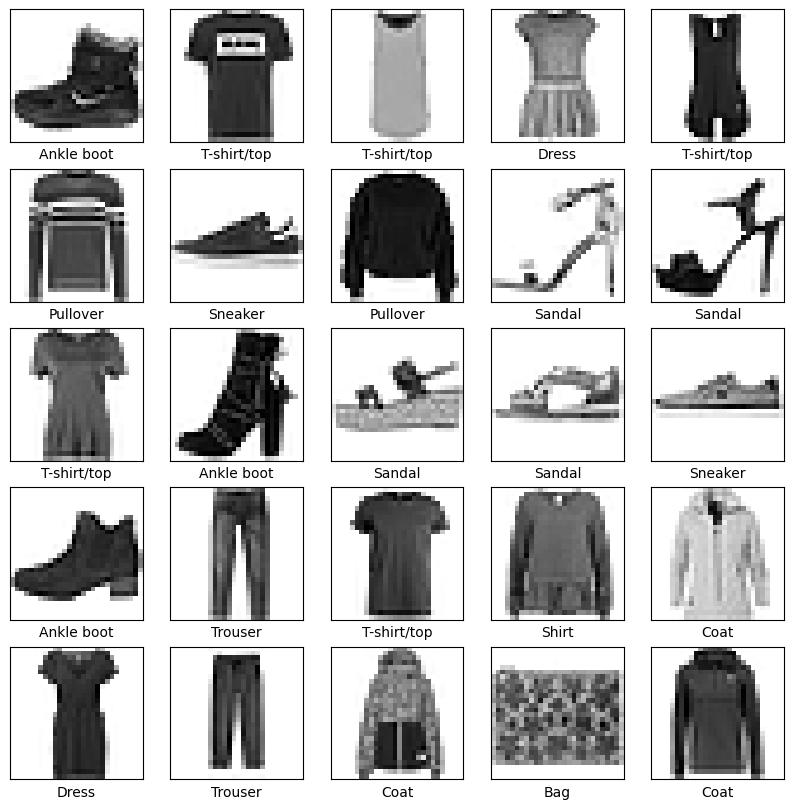

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4994 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3778 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3364 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2956 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2695 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2481 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.237

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3378 - accuracy: 0.8836 - 629ms/epoch - 2ms/step

Test accuracy: 0.8835999965667725


In [30]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [32]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [33]:
predictions[0]

array([1.5578306e-06, 1.4646903e-08, 1.4949780e-08, 4.3963780e-10,
       5.3641349e-09, 2.7932711e-03, 2.3792596e-08, 1.9028235e-02,
       5.4699910e-07, 9.7817630e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])

9

In [35]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

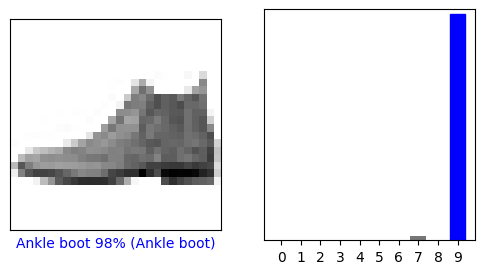

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

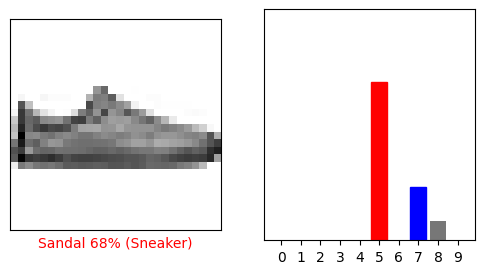

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

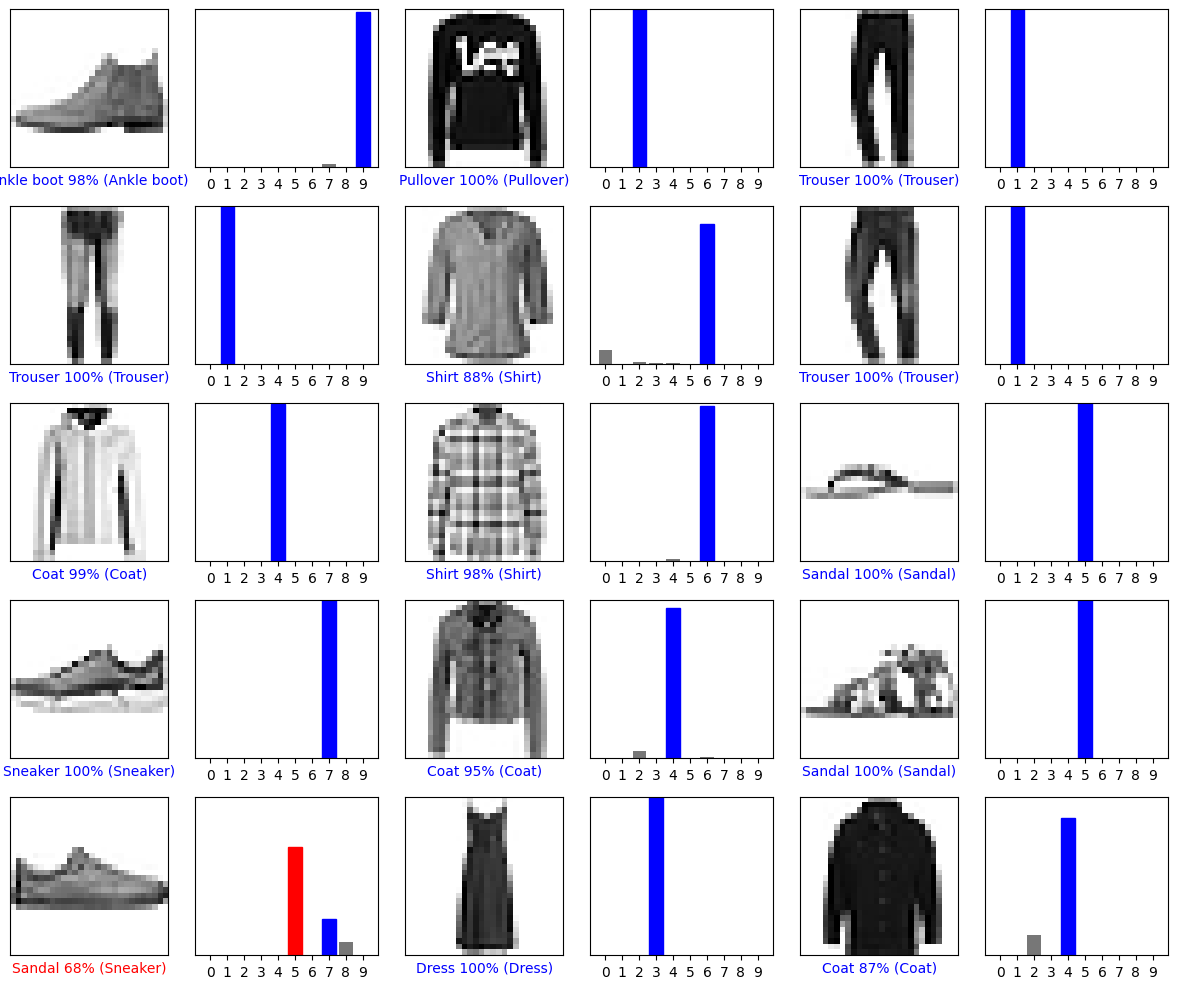

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [41]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [42]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 36ms/step
[[1.6387577e-05 1.5253186e-12 9.9879777e-01 8.2074898e-09 4.9340678e-04
  3.0413891e-16 6.9240440e-04 3.8198218e-17 7.8369672e-11 1.6392361e-16]]


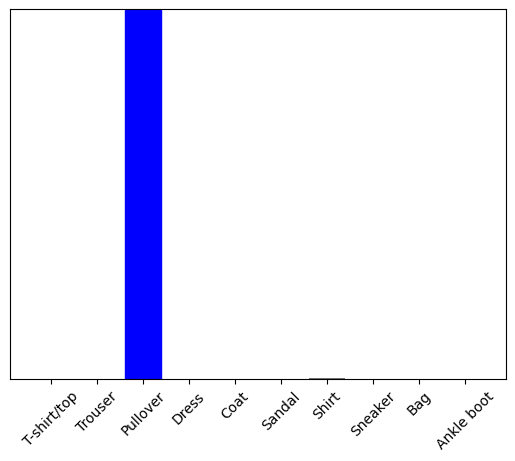

In [44]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [45]:
np.argmax(predictions_single[0])

2